<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter11/Ranking_with_Bandits.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After https://github.com/Kenza-AI/mab-ranking/blob/master/examples/jester/example.ipynb

In [1]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/main/chapter11/jesterfinal151cols.csv'

In [2]:
import pandas as pd
jester_data = pd.read_csv(URL, header=None)

In [3]:
# jester_data.columns = [f"joke_{col}" for col in jester_data.columns]
jester_data.index.name = "users"

In [4]:
jester_data.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
users,,,,,,,,,,,,,,,,,,,,,
0,62,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,34,99,99,99,99,-9.68750,99,9.93750,9.53125,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,18,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,82,99,99,99,99,6.90625,99,4.75000,-5.90625,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,27,99,99,99,99,-0.03125,99,-9.09375,-0.40625,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


In [5]:
for col in jester_data.columns:
    jester_data[col] = jester_data[col].apply(lambda x: 0.0 if x>=99 or x<7.0 else 1.0)

In [6]:
jester_data

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
users,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# keep users with at least one rating for a joke
jester_data = jester_data[jester_data.sum(axis=1) > 0]

In [8]:
jester_data

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
users,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pip install git+https://github.com/benman1/mab-ranking

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
  Cloning https://github.com/benman1/mab-ranking to /tmp/pip-req-build-ychcbqcp
  Running command git clone --filter=blob:none --quiet https://github.com/benman1/mab-ranking /tmp/pip-req-build-ychcbqcp
  Resolved https://github.com/benman1/mab-ranking to commit d94f272bb0e3833607eb035890e969cd3a820eb2
  Preparing metadata (setup.py) ... done
  Using cached flake8-7.2.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached mock-5.2.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached pytest-8.3.5-py3-none-any.whl.metadata (7.6 kB)
  Using cached pytest_cov-6.1.1-py3-none-any.whl.metadata (28 kB)
  Using cached mccabe-0.7.0-py2.py3-none-any.whl.metadata (5.0 kB)
  Using cached pycodestyle-2.13.0-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached pyflakes-3.3.2-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jupyter_console-6.6.3-py3-none-an

In [10]:
# setting up the bandits:
from mab_ranking.bandits.rank_bandits import IndependentBandits
from mab_ranking.bandits.bandits import BetaThompsonSampling, DirichletThompsonSampling

independent_bandits = IndependentBandits(
    num_arms=jester_data.shape[1],
    num_ranks=10,
    bandit_class=DirichletThompsonSampling
)

In [11]:
from tqdm import trange

num_steps = 7000
hit_rates = []
for _ in trange(1, num_steps + 1):
    selected_items = set(independent_bandits.choose())
    # Pick a users choices at random
    random_user = jester_data.sample().iloc[0, :]
    ground_truth = set(random_user[random_user == 1].index)
    hit_rate = len(ground_truth.intersection(selected_items)) / len(ground_truth)
    feedback_list = [1.0 if item in ground_truth else 0.0 for item in selected_items]
    independent_bandits.update(selected_items, feedback_list)
    hit_rates.append(hit_rate)

100%|██████████| 7000/7000 [00:15<00:00, 450.69it/s]


Text(0, 0.5, 'Hit rate')

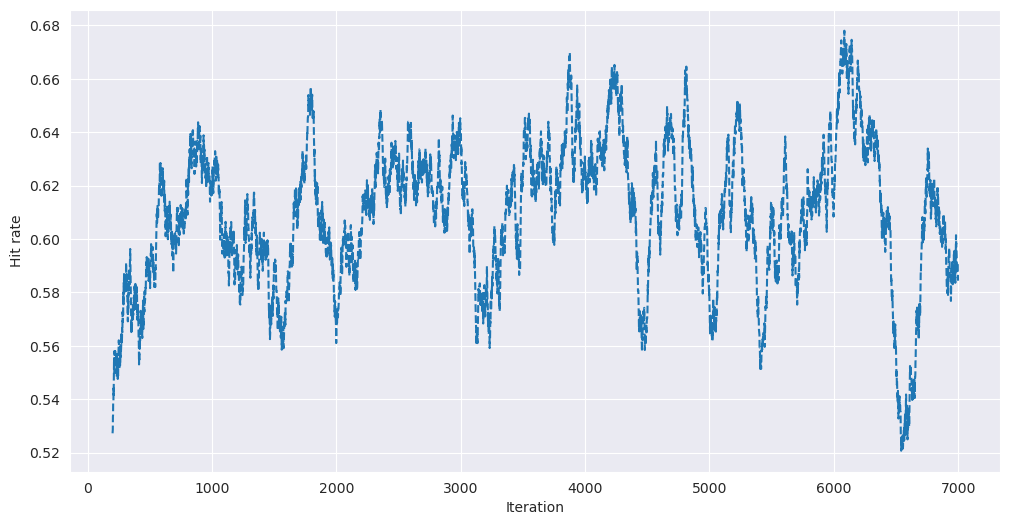

In [12]:
import matplotlib.pyplot as plt

stats = pd.Series(hit_rates)
plt.figure(figsize=(12, 6))
plt.plot(stats.index, stats.rolling(200).mean(), "--")
plt.xlabel('Iteration')
plt.ylabel('Hit rate')

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(jester_data)
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaler.transform(jester_data))
contexts = pd.Series(kmeans.labels_, index=jester_data.index)

In [14]:
contexts.value_counts()

2    38737
1     7643
0     2384
3      903
4      294
Name: count, dtype: int64

In [15]:
independent_bandits = IndependentBandits(
    num_arms=jester_data.shape[1],
    num_ranks=10,
    bandit_class=DirichletThompsonSampling
)

num_steps = 7000
hit_rates = []
for _ in trange(1, num_steps + 1):
    # Pick a users choices at random
    random_user = jester_data.sample().iloc[0, :]
    context = {"previous_action": contexts.loc[random_user.name]}
    selected_items = set(independent_bandits.choose(
        context=context
    ))
    ground_truth = set(random_user[random_user == 1].index)
    hit_rate = len(ground_truth.intersection(selected_items)) / len(ground_truth)
    feedback_list = [1.0 if item in ground_truth else 0.0 for item in selected_items]
    independent_bandits.update(selected_items, feedback_list, context=context)
    hit_rates.append(hit_rate)

100%|██████████| 7000/7000 [00:14<00:00, 483.53it/s]


Text(0, 0.5, 'Hit rate')

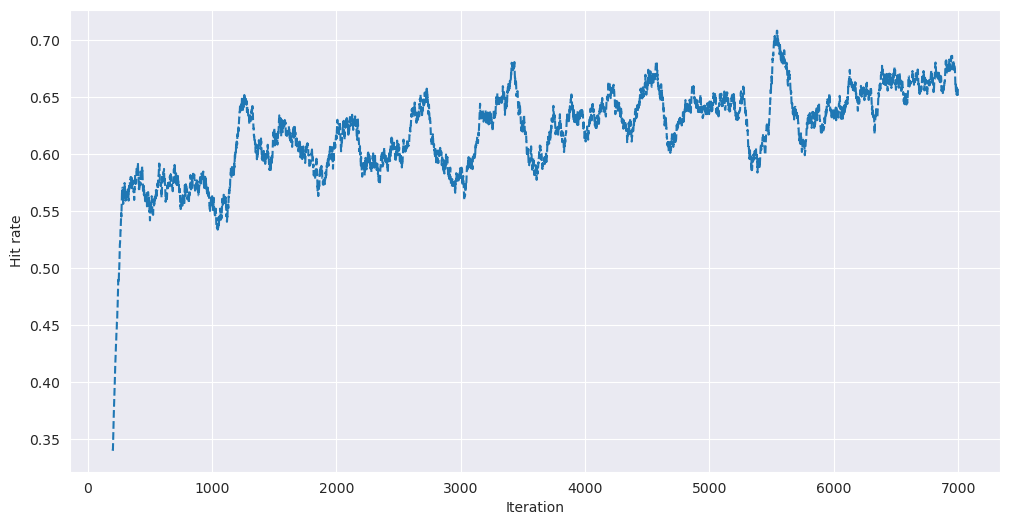

In [16]:
import matplotlib.pyplot as plt

stats = pd.Series(hit_rates)
plt.figure(figsize=(12, 6))
plt.plot(stats.index, stats.rolling(200).mean(), "--")
plt.xlabel('Iteration')
plt.ylabel('Hit rate')